# Taher Muhammedali - 0478012

## Assignment 2 - Task 3 - Data Science ESM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### (a)

In [2]:
# Reading csv with parsed dates

In [3]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
fn = "https://tubcloud.tu-berlin.de/s/af5G99i35dwNPCz/download/water-flows.csv"
df = pd.read_csv(fn, parse_dates=['Date'], date_parser=dateparse, index_col=0)
df.head(3)

,Scaled Flow
Date,
1983-01-01,1.445017
1983-01-02,1.808810
1983-01-03,3.476350


### (b)

In [4]:
# Plotting monthly mean flow rate for entire duration

<AxesSubplot: title={'center': 'Monthly Mean Flow Rates from 1987 to 2014'}, xlabel='Date', ylabel='Flow [m3/s]'>

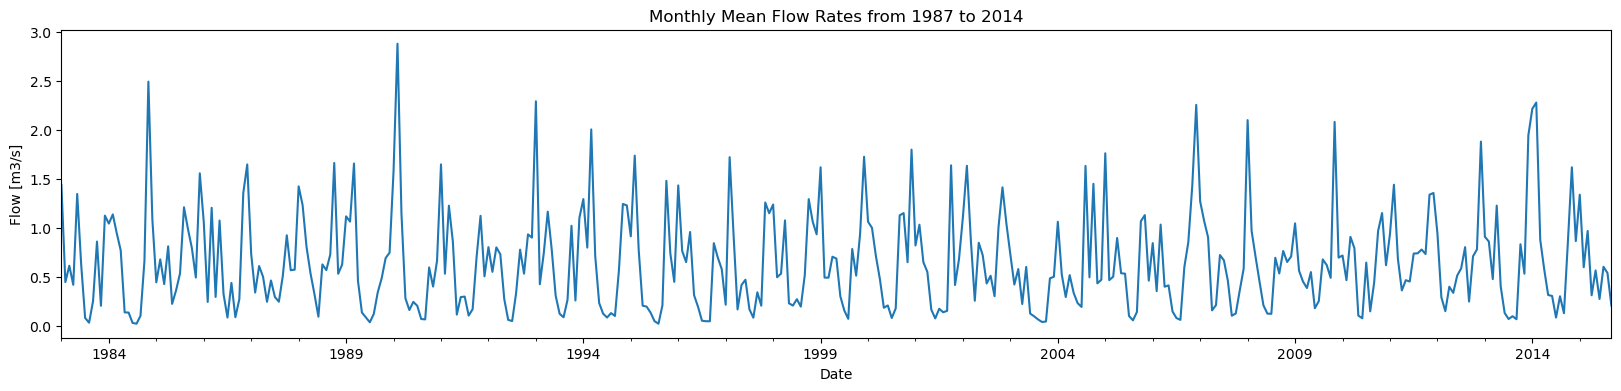

In [5]:
fig = plt.figure(figsize=(20, 4))

ts = pd.Series(df['Scaled Flow'], index=df.index)
plt.title('Monthly Mean Flow Rates from 1987 to 2014')
plt.ylabel('Flow [m3/s]')
plt.xlabel('Year')
ts.resample("M").mean().plot()

In [6]:
# From the above plot we can see that the flow rate variation also has a seasonal pattern even though it might not be consistent every year

### (c)

In [7]:
min = np.quantile(df['Scaled Flow'], 0.05)
print("The compensation flow corresponding to 5% quantile is",round(min,3),"m3/s")

The compensation flow corresponding to 5% quantile is 0.055 m3/s


### (d)

In [8]:
max = np.quantile(df['Scaled Flow'], 0.70)
print("The design flow corresponding to 70% quantile is",round(max,3),"m3/s")

The design flow corresponding to 70% quantile is 0.673 m3/s


### (e)

In [9]:
# Creating a new column with the available flow which is deudcted for reserve flow and capped at a max of design flow

In [10]:
df['AvailableFlow'] = df['Scaled Flow'] - np.quantile(df['Scaled Flow'], 0.05)
df.AvailableFlow[df.AvailableFlow < 0] = 0
df.loc[df['AvailableFlow'] > max, 'AvailableFlow'] = max
df.tail(2)

,Scaled Flow,AvailableFlow
Date,,
2015-09-29,0.142009,0.087440
2015-09-30,0.133422,0.078853


### (f)

In [11]:
# Plotting Duration curve for available and total flow

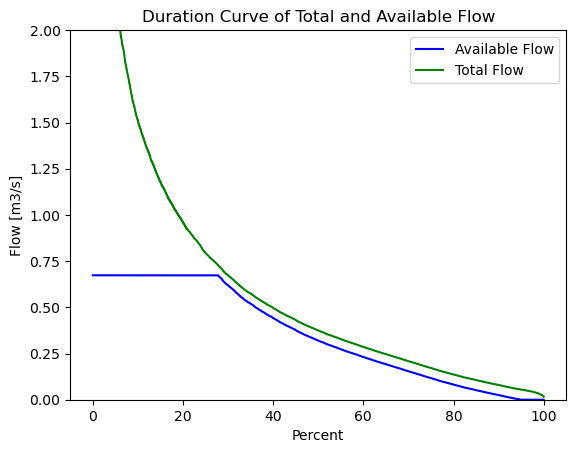

In [12]:
abc = df['AvailableFlow']
ghi = df['Scaled Flow']
x = np.linspace(0, 100, len(df.AvailableFlow))
abc = abc.sort_values(ascending=False).reset_index(drop=True)
ghi = ghi.sort_values(ascending=False).reset_index(drop=True)
plt.plot(x, abc, color="blue")
plt.plot(x, ghi, color="green")
plt.xlabel('Percent')
plt.ylabel('Flow [m3/s]')
plt.title('Duration Curve of Total and Available Flow')
plt.ylim(top=2)
plt.ylim(bottom=0)
plt.legend(('Available Flow','Total Flow'))

### (g)

In [13]:
# Calculating Rated Power using the max flow rate as per design cap

In [14]:
g = 9.81
eff = 0.85
H = 60
rho = 1000
Rated_Power = (rho * g * H * eff * max) / 1e6  #Converting from W to MW
print ("The Rated Power of this scheme is",round(Rated_Power,2),"MW on a daily basis")

The Rated Power of this scheme is 0.34 MW on a daily basis


### (h)

In [15]:
# Creating a new column and calculating Power for each flow

In [16]:
df['AvailablePower'] = (df['AvailableFlow'] * rho * g * H * eff) /1e6
df.head(2)

,Scaled Flow,AvailableFlow,AvailablePower
Date,,,
1983-01-01,1.445017,0.673387,0.336902
1983-01-02,1.808810,0.673387,0.336902


### (i)

In [17]:
# Calculating Capacity factor for the entire duration

In [18]:
capfactor = df['AvailablePower'].mean()/Rated_Power
print("The capacity factor of this run-of-river design is",round(capfactor*100,1),"%")

The capacity factor of this run-of-river design is 52.8 %


### (j)

In [19]:
# Computing and plotting total annual energy yields using resample method

In [20]:
df['AvailablePower'].resample('Y').sum().head(3) # Remove head to see total power for each year

Date
1983-12-31    64.559535
1984-12-31    64.739050
1985-12-31    73.239583
Freq: A-DEC, Name: AvailablePower, dtype: float64

Text(0.5, 1.0, 'Annual Power Yield from 1983 to 2014')

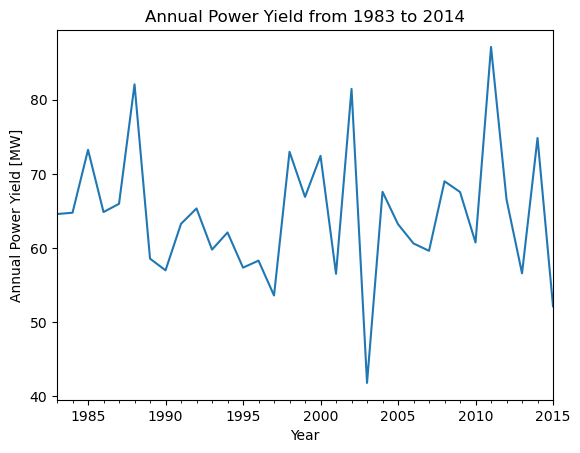

In [21]:
xs = pd.Series(df['AvailablePower'], index=df.index)
xs.resample("Y").sum().plot()
plt.xlabel('Year')
plt.ylabel('Annual Power Yield [MW]')
plt.title('Annual Power Yield from 1983 to 2014')

### (k)

In [22]:
#Finding mean Power of all the years and finding deviation per year

Text(0.5, 1.0, 'Annual Power Deviation from Long-Term Average')

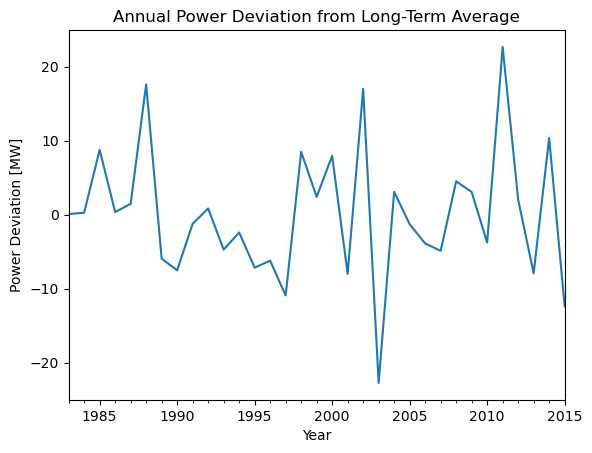

In [23]:
(xs.resample("Y").sum() - xs.resample("Y").sum().mean()).plot()
plt.xlabel('Year')
plt.ylabel('Power Deviation [MW]')
plt.title('Annual Power Deviation from Long-Term Average')

In [24]:
# We can see that the above two plots have quite a similar trend,
# except the axis which actually shows how much the deviation is per year from the long term annual average

### (l)

In [25]:
# Now we will create a new Dataframe and redo the above analysis for varying Design flow cap.

In [26]:
newdf = pd.DataFrame(index=df.index)
newdf["ScaledFlow"] = df['Scaled Flow']
newdf['AvailableFlow'] = df['Scaled Flow'] - np.quantile(df['Scaled Flow'], 0.05) # Compensation Flow  will remain always
newdf.AvailableFlow[newdf.AvailableFlow < 0] = 0

In [27]:
# Creating a List to calculate Rated Power and Annual Energy Yield and add to it

In [28]:
alphalist = np.linspace(0, 100, 21) / 100
alphalist = alphalist.tolist()
PowerList = []
AnnEnYd = []
string = 'alpha='

In [29]:
# For loops calculate the values and appending to empty lists and adding new columns to daatframe

In [30]:
for alpha in alphalist:
    newdf['AvailableFlow1'] = newdf['AvailableFlow']
    
    max = np.quantile(newdf['ScaledFlow'], alpha)
    newdf.loc[newdf['AvailableFlow1'] > max, 'AvailableFlow1'] = max
    
    newcolname = string + str(round(alpha*100)) + "%"
    newdf.rename(columns = {'AvailableFlow1': newcolname}, inplace = True)
    
    newRated_Power = (rho * g * H * eff * newdf[newcolname].max()) /1e6
    PowerList.append(newRated_Power)
    
    newdf['AvailablePower'] = (newdf[newcolname] * rho * g * H * eff) /1e6
    zs = pd.Series(newdf['AvailablePower'], index=newdf.index)
    AnnEnYd.append(zs.resample("Y").sum().mean())

In [31]:
PowerList[14] == Rated_Power #Verifying Rated Power calculated at 70% earlier matches with the one calculated using for loop

True

In [32]:
newdf['alpha=70%'].sum() == df['AvailableFlow'].sum() #Verifying Total Flow calculated at 70% earlier matches with the one calculated using for loop

True

In [33]:
AnnEnYd[14] == xs.resample("Y").sum().mean() #Verifying Annual Yield calculated at 70% earlier matches with the one calculated using for loop

True

In [34]:
newdf.head(2)

,ScaledFlow,AvailableFlow,alpha=0%,AvailablePower,alpha=5%,alpha=10%,alpha=15%,alpha=20%,alpha=25%,alpha=30%,...,alpha=55%,alpha=60%,alpha=65%,alpha=70%,alpha=75%,alpha=80%,alpha=85%,alpha=90%,alpha=95%,alpha=100%
Date,,,,,,,,,,,,,,,,,,,,,
1983-01-01,1.445017,1.390448,0.016435,0.695655,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.57459,0.673387,0.794436,0.96119,1.178173,1.390448,1.390448,1.390448
1983-01-02,1.808810,1.754241,0.016435,0.877664,0.054569,0.079776,0.106368,0.136561,0.171463,0.208212,...,0.431197,0.496476,0.57459,0.673387,0.794436,0.96119,1.178173,1.511497,1.754241,1.754241


In [35]:
# Getting all column headers and removing the ones not required

In [36]:
alphanames = newdf.columns.values.tolist()
alphanames.remove('ScaledFlow')
alphanames.remove('AvailableFlow')
alphanames.remove('AvailablePower')

In [37]:
# Creating a new dataframe and adding those lists generated above

In [38]:
anotherdf = pd.DataFrame(index=alphanames)
anotherdf['Rated_Power'] = PowerList
anotherdf['Mean_AnnualEnergyYield'] = AnnEnYd
anotherdf.head()

,Rated_Power,Mean_AnnualEnergyYield
alpha=0%,0.008223,2.779246
alpha=5%,0.027301,8.865107
alpha=10%,0.039913,12.628959
alpha=15%,0.053217,16.405210
alpha=20%,0.068323,20.476482


In [39]:
# Plotting the relation between Power and Annual Energy Yield

Text(0.5, 1.0, 'Relation of Power Rating vs Avg Annual Energy Yield')

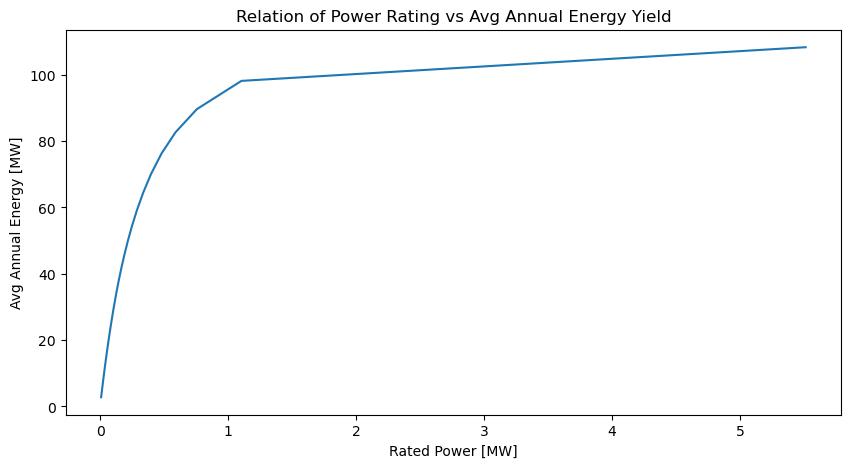

In [40]:
fig = plt.figure(figsize=(10, 5))
x = anotherdf['Rated_Power']
y = anotherdf['Mean_AnnualEnergyYield']
plt.plot(x, y)
plt.xlabel('Rated Power [MW]')
plt.ylabel('Avg Annual Energy [MW]')
plt.title('Relation of Power Rating vs Avg Annual Energy Yield')

In [41]:
# From the above plot we can conclude that if the generator was deisgned to maximum available flow rate, it would only yield a slightly higher average yield per year.
# However it could be recommended that the design flow cap be increased from 70% to 80%-85%